In [ ]:
#conda install -c conda-forge spacy

# Import and subset data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mydata = pd.read_csv('C:/Users/Janin/Downloads/CKME136/Full-Economic-News-DFE.csv', encoding = "ISO-8859-1")

In [3]:
mydata.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [4]:
data = mydata[['_unit_id','positivity', 'relevance', 'date','headline', 'text']]

data.head()

,_unit_id,positivity,relevance,date,headline,text
0,842613455,3.0,yes,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,842613456,NaN,no,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,842613457,NaN,no,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,842613458,NaN,no,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,842613459,3.0,yes,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


# Exploratory Data Analysis

In [5]:
data.groupby('relevance').count()

,_unit_id,positivity,date,headline,text
relevance,,,,,
no,6571,0,6571,6571,6571
not sure,9,0,9,9,9
yes,1420,1420,1420,1420,1420


In [6]:
data.groupby('positivity').count()

,_unit_id,relevance,date,headline,text
positivity,,,,,
2.0,35,35,35,35,35
3.0,343,343,343,343,343
4.0,255,255,255,255,255
5.0,205,205,205,205,205
6.0,214,214,214,214,214
7.0,295,295,295,295,295
8.0,71,71,71,71,71
9.0,2,2,2,2,2


In [7]:
relevance = data['relevance'].value_counts()
relevance
# 6571 of news are irrelevant to US economy
# 1420 of news are relevant to US economy
# 9 of news are ambiguious data
# imbalanced data

no          6571
yes         1420
not sure       9
Name: relevance, dtype: int64

# Pre-processing

Remove ambiguious and irrelevant data

In [8]:
data = data[data.relevance == 'yes']

In [9]:
positivity = data['positivity'].value_counts()
positivity
# positivity range from 1 to 9, with neutral represents that this article is not relevant to US economy

3.0    343
7.0    295
4.0    255
6.0    214
5.0    205
8.0     71
2.0     35
9.0      2
Name: positivity, dtype: int64

In [10]:
# length of headline for relevant news
headline_len_r = data[data['relevance']=='yes']['headline'].str.len()
# number of words in headline for relevant news
headline_word_counts_r = data[data['relevance']=='yes']['headline'].str.split().str.len()


print('Headline of relevant news has {} to {} characters, {} to {} words.'.format(headline_len_r.min(),
                                                                          headline_len_r.max(),
                                                                          headline_word_counts_r.min(),
                                                                          headline_word_counts_r.max()))


Headline of relevant news has 6 to 251 characters, 1 to 38 words.


In [11]:
headline_len_r.describe()

count    1420.000000
mean       66.289437
std        36.568721
min         6.000000
25%        38.000000
50%        61.000000
75%        89.000000
max       251.000000
Name: headline, dtype: float64

In [12]:
headline_word_counts_r.describe()

count    1420.000000
mean       10.791549
std         5.991908
min         1.000000
25%         6.000000
50%        10.000000
75%        14.000000
max        38.000000
Name: headline, dtype: float64

Text(0.5, 1.0, 'number of words in headline for relevant news')

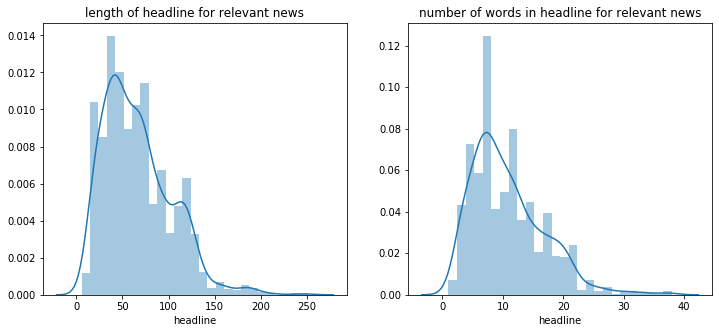

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(headline_len_r, ax = axes[0])
axes[0].set_title('length of headline for relevant news')
sns.distplot(headline_word_counts_r, ax = axes[1])
axes[1].set_title('number of words in headline for relevant news')


In [16]:
# length of text for relevant news
text_len_r = data[data['relevance']=='yes']['text'].str.len()
# number of words in text for relevant news
text_word_counts_r = data[data['relevance']=='yes']['text'].str.split().str.len()


print('Text of relevant news has {} to {} characters, {} to {} words.'.format(text_len_r.min(),
                                                                          text_len_r.max(),
                                                                          text_word_counts_r.min(),
                                                                          text_word_counts_r.max()))


Text of relevant news has 203 to 3987 characters, 20 to 615 words.


Text(0.5, 1.0, 'number of words in text for relevant news')

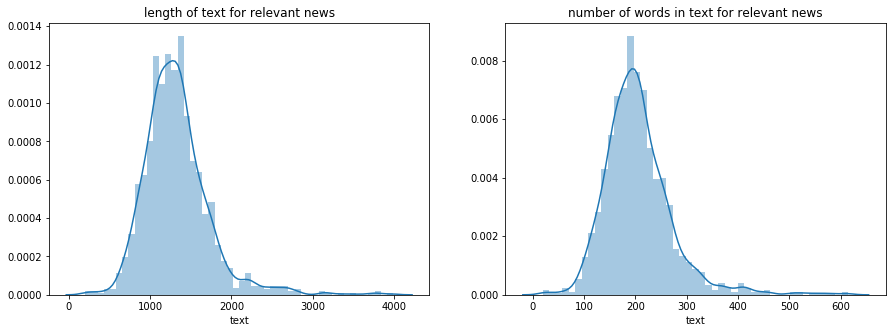

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(text_len_r, ax = axes[0])
axes[0].set_title('length of text for relevant news')
sns.distplot(text_word_counts_r, ax = axes[1])
axes[1].set_title('number of words in text for relevant news')


## Normalization

Using String library

In [18]:
import string

list of punctuation

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def rm_punc(contents):
    no_punc = ''.join([x.lower() for x in contents if x not in string.punctuation])
    return no_punc

### Remove punctuation in headline

In [21]:
data['headline_new'] = data['headline'].apply(rm_punc)

### Remove </br> tags and punctuation in text 

In [22]:
data['text_new'] = [word.replace('</br>', '') for word in data['text']]
data['text_new'] = data['text_new'].apply(rm_punc)


In [23]:
data.head(5)

,_unit_id,positivity,relevance,date,headline,text,headline_new,text_new
0,842613455,3.0,yes,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,yields on cds fell in the latest week,new york yields on most certificates of depos...
4,842613459,3.0,yes,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,currency trading dollar remains in tight range...,new york indecision marked the dollars tone a...
5,842613460,3.0,yes,11/23/11,"Stocks Fall Again; BofA, Alcoa Slide","Stocks declined, as investors weighed slower-t...",stocks fall again bofa alcoa slide,stocks declined as investors weighed slowertha...
9,842613464,4.0,yes,11/1/84,U.S. Dollar Falls Against Most Currencies; Dec...,The U.S. dollar declined against most major fo...,us dollar falls against most currencies declin...,the us dollar declined against most major fore...
12,842613467,4.0,yes,8/3/10,Defending Yourself Against Deflation,Author: James B. Stewart</br></br>The dreaded ...,defending yourself against deflation,author james b stewartthe dreaded d word is ba...


## Tokenization

In [24]:
import spacy 
nlp = spacy.load('en_core_web_sm')

In [25]:
data['headline_new'] = [nlp(x) for x in data['headline_new']]
data['text_new'] = [nlp(x) for x in data['text_new']]

In [26]:
data.head(5)

,_unit_id,positivity,relevance,date,headline,text,headline_new,text_new
0,842613455,3.0,yes,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,"(yields, on, cds, fell, in, the, latest, week)","(new, york, , yields, on, most, certificates,..."
4,842613459,3.0,yes,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,"(currency, trading, dollar, remains, in, tight...","(new, york, , indecision, marked, the, dollar..."
5,842613460,3.0,yes,11/23/11,"Stocks Fall Again; BofA, Alcoa Slide","Stocks declined, as investors weighed slower-t...","(stocks, fall, again, bofa, alcoa, slide)","(stocks, declined, as, investors, weighed, slo..."
9,842613464,4.0,yes,11/1/84,U.S. Dollar Falls Against Most Currencies; Dec...,The U.S. dollar declined against most major fo...,"(us, dollar, falls, against, most, currencies,...","(the, us, dollar, declined, against, most, maj..."
12,842613467,4.0,yes,8/3/10,Defending Yourself Against Deflation,Author: James B. Stewart</br></br>The dreaded ...,"(defending, yourself, against, deflation)","(author, james, b, stewartthe, dreaded, d, wor..."


## Stemming

In [27]:
conda install nltk

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [28]:
import nltk

In [29]:
from nltk.stem.snowball import SnowballStemmer

In [30]:
stemmer = SnowballStemmer(language='english')

In [31]:
data['headline_new'] = [[stemmer.stem(x.text) for x in line] for line in data['headline_new']]
data['text_new'] = [[stemmer.stem(x.text) for x in line] for line in data['text_new']]

In [32]:
data.head()

,_unit_id,positivity,relevance,date,headline,text,headline_new,text_new
0,842613455,3.0,yes,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,"[yield, on, cds, fell, in, the, latest, week]","[new, york, , yield, on, most, certif, of, de..."
4,842613459,3.0,yes,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,"[currenc, trade, dollar, remain, in, tight, ra...","[new, york, , indecis, mark, the, dollar, ton..."
5,842613460,3.0,yes,11/23/11,"Stocks Fall Again; BofA, Alcoa Slide","Stocks declined, as investors weighed slower-t...","[stock, fall, again, bofa, alcoa, slide]","[stock, declin, as, investor, weigh, slowertha..."
9,842613464,4.0,yes,11/1/84,U.S. Dollar Falls Against Most Currencies; Dec...,The U.S. dollar declined against most major fo...,"[us, dollar, fall, against, most, currenc, dec...","[the, us, dollar, declin, against, most, major..."
12,842613467,4.0,yes,8/3/10,Defending Yourself Against Deflation,Author: James B. Stewart</br></br>The dreaded ...,"[defend, yourself, against, deflat]","[author, jame, b, stewartth, dread, d, word, i..."


## Stop-word Removal 

In [33]:
print(nlp.Defaults.stop_words)

{'four', 'beyond', 'if', 'from', 'then', 'onto', 'on', 'he', 'everyone', 'namely', 'does', 'our', 'always', 'whose', 'keep', 'a', 'next', 'yourself', 'several', 'fifty', 'were', 'about', 'upon', 'each', 'seeming', 'ourselves', 'see', 'five', 'its', 'further', 'against', 'hereupon', 'am', 'the', 'eleven', 'above', 'along', 'fifteen', 'toward', 'since', 'yourselves', 'it', 'whereafter', 'hereby', 'did', 'hers', 'sixty', 'both', 'is', 'where', 'front', 'we', 'using', 'side', 'are', 'somehow', 'amount', 'itself', 'so', 'that', 'one', 'first', 'had', 'whence', 'thus', 'either', 'whereas', 'somewhere', 'few', 'nowhere', 'ever', 'nevertheless', 'myself', 'although', 'doing', 'whoever', 'eight', '‘re', 'former', 'this', 'besides', 'out', 'those', 'every', 'wherein', 'make', 'neither', '’d', 'has', 'was', 'must', 'mine', 'been', 'herein', 'your', '’re', 'how', 'behind', 'rather', 'due', 'nor', 'done', 'meanwhile', 'ours', 'last', 'anywhere', 'go', 'everywhere', 'own', 'forty', 'third', 'empty',

In [34]:
def rm_stop(contents):
    no_stop = [x for x in contents if x not in nlp.Defaults.stop_words]
    return no_stop

In [35]:
data['headline_new'] = data['headline_new'].apply(rm_stop)
data['text_new'] = data['text_new'].apply(rm_stop)
data.head(5)

,_unit_id,positivity,relevance,date,headline,text,headline_new,text_new
0,842613455,3.0,yes,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,"[yield, cds, fell, latest, week]","[new, york, , yield, certif, deposit, offer, ..."
4,842613459,3.0,yes,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,"[currenc, trade, dollar, remain, tight, rang, ...","[new, york, , indecis, mark, dollar, tone, tr..."
5,842613460,3.0,yes,11/23/11,"Stocks Fall Again; BofA, Alcoa Slide","Stocks declined, as investors weighed slower-t...","[stock, fall, bofa, alcoa, slide]","[stock, declin, investor, weigh, slowerthanexp..."
9,842613464,4.0,yes,11/1/84,U.S. Dollar Falls Against Most Currencies; Dec...,The U.S. dollar declined against most major fo...,"[dollar, fall, currenc, declin, soften, bond, ...","[dollar, declin, major, foreign, currenc, yest..."
12,842613467,4.0,yes,8/3/10,Defending Yourself Against Deflation,Author: James B. Stewart</br></br>The dreaded ...,"[defend, deflat]","[author, jame, b, stewartth, dread, d, word, c..."
